In [1]:
%matplotlib inline
import pydotplus
import collections
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train = pd.read_csv('vermelho.csv', delimiter=';')
test = pd.read_csv('testevermelho.csv', delimiter=';')

In [3]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.34,0.21,2.5,0.075,41.0,68.0,0.99586,3.37,0.54,10.1,6
1,7.7,0.58,0.01,1.8,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,7
2,7.1,0.59,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5,7
3,7.3,0.55,0.01,1.8,0.093,9.0,15.0,0.99514,3.35,0.58,11.0,7
4,8.1,0.82,0.00,4.1,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5


In [4]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
        'free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol']
cols2 = ['quality']

x_train = train.as_matrix(cols)
y_train = train.as_matrix(cols2)
x_test = test.as_matrix(cols)
y_test = test.as_matrix(cols2)

data_feature_name = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

x_test

array([[  7.20000000e+00,   3.40000000e-01,   2.10000000e-01, ...,
          3.37000000e+00,   5.40000000e-01,   1.01000000e+01],
       [  7.70000000e+00,   5.80000000e-01,   1.00000000e-02, ...,
          3.32000000e+00,   5.60000000e-01,   1.05000000e+01],
       [  7.10000000e+00,   5.90000000e-01,   0.00000000e+00, ...,
          3.42000000e+00,   5.50000000e-01,   1.15000000e+01],
       ..., 
       [  6.30000000e+00,   5.10000000e-01,   1.30000000e-01, ...,
          3.42000000e+00,   7.50000000e-01,   1.10000000e+01],
       [  5.90000000e+00,   6.45000000e-01,   1.20000000e-01, ...,
          3.57000000e+00,   7.10000000e-01,   1.02000000e+01],
       [  6.00000000e+00,   3.10000000e-01,   4.70000000e-01, ...,
          3.39000000e+00,   6.60000000e-01,   1.10000000e+01]])

C:\Users\lidia\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


0.660127826942
Saída esperada: 7.000000
Saída predita: 5.833333


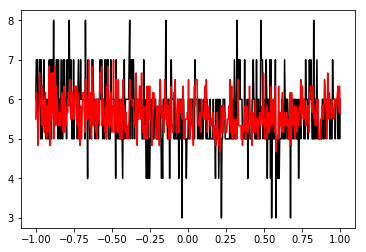

In [5]:
value = 100

for k in range (60):
    knn = KNeighborsClassifier(n_neighbors=k+1, p=2)
    knn.fit(x_train, y_train)
    outputs = knn.predict(x_test)
    if(value > mean_squared_error(y_test, outputs)):
        value = mean_squared_error(y_test, outputs)
        neig = k+1

knn = KNeighborsRegressor(n_neighbors=neig, p=2)
knn.fit(x_train, y_train)
outputs = knn.predict(x_test)
print(mean_squared_error(y_test, outputs))

print('Saída esperada: %f' % y_test[8])
print('Saída predita: %f' % outputs[8])

import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.linspace(-1, 1, len(y_test)), y_test, label='data', color='black')
plt.plot(np.linspace(-1, 1, len(y_test)), outputs, label='prediction', color='red')
plt.show()

Saída esperada: 7.000000
Saída predita: 6.000000
0.776991150442


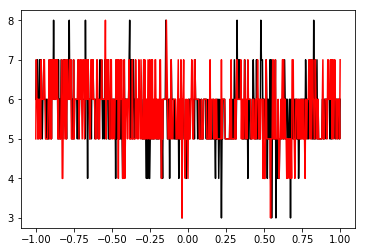

In [6]:
from sklearn import tree

features = x_train
labels = y_train

# o classificador encontra padrões nos dados de treinamento
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best') # instância do classificador
clf = clf.fit(features, labels) # fit encontra padrões nos dados

# iremos utilizar para classificar uma nova fruta
outputs = clf.predict(x_test)

print('Saída esperada: %f' % y_test[8])
print('Saída predita: %f' % outputs[8])
print(mean_squared_error(y_test, outputs))

import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.linspace(-1, 1, len(y_test)), y_test, label='data', color='black')
plt.plot(np.linspace(-1, 1, len(y_test)), outputs, label='prediction', color='red')
plt.show()

In [187]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.34,0.21,2.5,0.075,41.0,68.0,0.99586,3.37,0.54,10.1,6
1,7.7,0.58,0.01,1.8,0.088,12.0,18.0,0.99568,3.32,0.56,10.5,7
2,7.1,0.59,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5,7
3,7.3,0.55,0.01,1.8,0.093,9.0,15.0,0.99514,3.35,0.58,11.0,7
4,8.1,0.82,0.00,4.1,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5


In [9]:
import math

num = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
quali5 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
quali6 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
quali7 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
quali8 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
name = np.array(['','fixed acidity','volatile acidity','citric acid','residual sugar',
                 'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH',
                 'sulphates','alcohol','quality'])


def info():
    calc(0)
    result = 0
    for i in range (13):
        result += entropia(i)
        result = abs(result)
    print(result)
    
def entropia(value):
    r = 0
    if quali5[value] != 0:
            r += quali5[value]/num[value] * np.log2(quali5[value]/num[value])
    if quali6[value] != 0:
        r += quali6[value]/num[value] * np.log2(quali6[value]/num[value])
    if quali7[value] != 0:
        r += quali7[value]/num[value] * np.log2(quali7[value]/num[value])
    if quali8[value] != 0:
        r += quali8[value]/num[value] * np.log2(quali8[value]/num[value])
    return abs(r)

def qualidade(value, number):
    if test['quality'][number] == 5:
        quali5[value] += 1
    if test['quality'][number] == 6:
        quali6[value] += 1
    if test['quality'][number] == 7:
        quali7[value] += 1
    if test['quality'][number] == 8:
        quali8[value] += 1
                
def calc(number):
    for oi in test[name[1]]:
        for n in range (13):
            if math.floor(oi) == n:
                num[n] += 1
                qualidade(n, number)
                number += 1

info()

10.4798085899


In [7]:
dot_data = tree.export_graphviz(clf, feature_names=data_feature_name, out_file=None,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')

edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
    
for edge in edges:
    edges[edge].sort() 
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
        
graph.write_png('tree.png')

InvocationException: GraphViz's executables not found